In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
# lazy loading of data
ds = xr.open_dataset(
    "http://psl.noaa.gov/thredds/dodsC/Projects/CEFI/regional_mom6/cefi_portal/northeast_pacific/full_domain/hindcast/monthly/regrid/r20250509/chl.nep.full.hcast.monthly.regrid.r20250509.199301-202412.nc",
    chunks={"time": 1, "lat": 10, "lon": 10, "z_l": 52}
)

In [6]:
wget https://server/path/to/your_dataset.nc -O mydata.nc

SyntaxError: invalid syntax (3079323189.py, line 1)

In [3]:
-117+365

248

In [4]:
ds.chl

<xarray.DataArray 'chl' (time: 384, z_l: 52, lat: 815, lon: 341)> Size: 22GB
dask.array<open_dataset-chl, shape=(384, 52, 815, 341), dtype=float32, chunksize=(1, 52, 10, 10), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 3kB 1993-01-16T12:00:00 ... 2024-12-16T12:...
  * z_l      (z_l) float64 416B 2.5 7.5 12.5 17.5 ... 5.25e+03 5.75e+03 6.25e+03
  * lon      (lon) float64 3kB 156.9 157.2 157.5 157.8 ... 254.4 254.7 255.0
  * lat      (lat) float64 7kB 10.81 10.89 10.98 11.07 ... 80.55 80.63 80.72
Attributes:
    regrid_method:  bilinear
    units:          ug kg-1
    long_name:      Chlorophyll
    cell_methods:   area:mean z_l:mean yh:mean xh:mean time: mean
    cell_measures:  volume: volcello area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    _ChunkSizes:    [100  10 200 200]

In [5]:
jan2020 = ds.sel(time='2020-01-13',lat=33.418, lon=248,method='nearest').load()

RuntimeError: NetCDF: DAP failure

In [32]:
jan2020

<xarray.Dataset> Size: 648B
Dimensions:  (z_l: 52)
Coordinates:
    time     datetime64[ns] 8B 2020-01-16T12:00:00
  * z_l      (z_l) float64 416B 2.5 7.5 12.5 17.5 ... 5.25e+03 5.75e+03 6.25e+03
    lon      float64 8B 248.1
    lat      float64 8B 33.4
Data variables:
    chl      (z_l) float32 208B dask.array<chunksize=(52,), meta=np.ndarray>
Attributes: (12/28)
    NumFilesInSet:          1
    title:                  NEP10k_COBALT_92-93_spinup_new_relax_ts
    associated_files:       areacello: 19930101.ocean_static.nc
    grid_type:              regular
    grid_tile:              N/A
    external_variables:     volcello areacello
    ...                     ...
    cefi_ensemble_info:     N/A
    cefi_forcing:           N/A
    cefi_data_doi:          10.5281/zenodo.13936240
    cefi_paper_doi:         10.5194/gmd-2024-195
    cefi_aux:               Postprocessed Data : regrid to regular grid
    _NCProperties:          version=2,netcdf=4.9.2,hdf5=1.14.3

RuntimeError: NetCDF: DAP failure

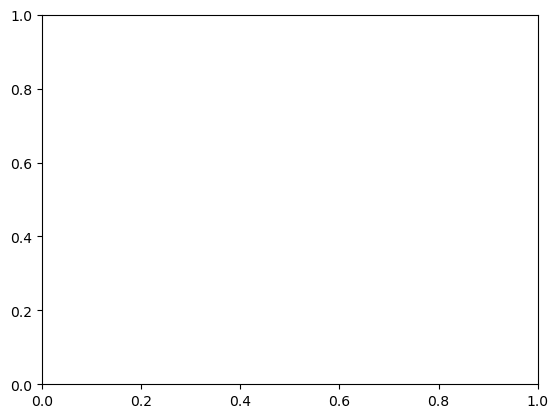

In [33]:
plt.plot(jan2020.chl)